In [1]:
# Install packages
import Pkg
Pkg.instantiate()
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
   Updating `~/ShallowWaters.jl/Project.toml`
 [no changes]
   Updating `~/ShallowWaters.jl/Manifest.toml`
 [no changes]


In [2]:
# Import Packages
using PyPlot
using ShallowWaters

┌ Info: Precompiling ShallowWaters [56019723-2d87-4a65-81ff-59d5d8913e3c]
└ @ Base loading.jl:1260


# Double Gyre Example

## Run Integration

In [3]:
P = RunModel(Ndays=100, nx=100, L_ratio=1, bc="nonperiodic",
             wind_forcing_x="double_gyre", topography="seamount")

Starting ShallowWaters on Sun, 15 Nov 2020 11:18:53 without output.
100% Integration done in 14.8s.


ShallowWaters.PrognosticVars{Float32}(Float32[0.0022185922 0.00385089 … -0.0065850844 -0.00083484576; 0.0062243287 0.009498938 … -0.017286073 -0.002825621; … ; -0.004096258 -0.007868949 … 0.0012447764 0.0006511054; -0.0013609382 -0.002613597 … 0.00044030146 0.00017750739], Float32[-0.0022555795 -0.0061380677 … -0.0074942 -0.0008736203; -0.004047874 -0.009733308 … -0.012768304 -0.0020292; … ; -0.0027770284 -0.008071588 … -0.001223702 -0.00044600962; -0.0014008377 -0.0040520006 … -0.00056518795 -0.00015077305], Float32[0.11778253 0.117520414 … -0.053433973 -0.05307449; 0.11602407 0.11506872 … -0.054373845 -0.05280769; … ; -0.02574268 -0.025015382 … -0.0031282592 -0.0032562215; -0.02742144 -0.027217183 … -0.0027279435 -0.0027471543], Float32[1.0 0.9999996 … 0.0012521422 0.00015401824; 0.9999998 0.99999964 … 0.004494297 0.00038201915; … ; 1.0 0.99999946 … 4.6f-44 0.0; 1.0 0.9999992 … 0.0 0.0])

## Plot Results

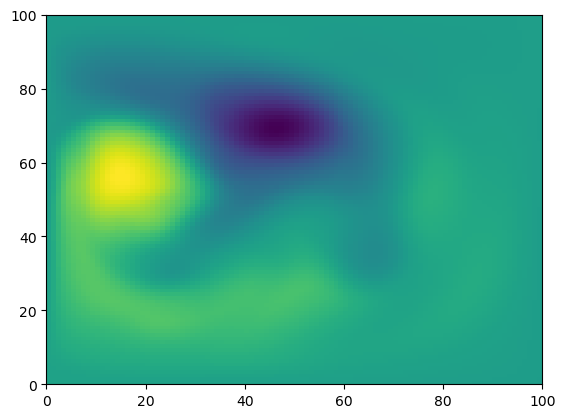

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd496580d0>

In [4]:
pcolormesh(P.η')

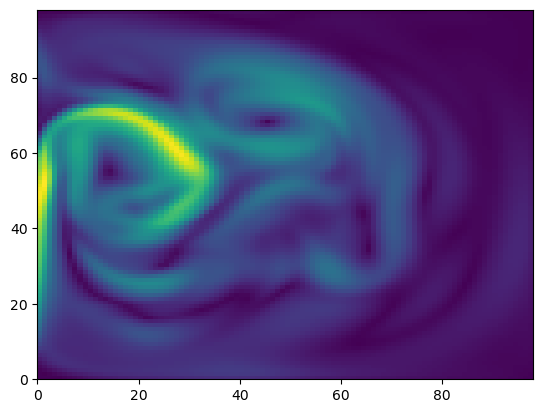

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd4ad70250>

In [5]:
speed = sqrt.(Ix(P.u.^2)[:,2:end-1] + Iy(P.v.^2)[2:end-1,:])
pcolormesh(speed')

# Varying Parameters

In [6]:
P2 = RunModel(Ndays=100, nx=100, L_ratio=0.2, bc="nonperiodic",
              wind_forcing_x="double_gyre", topography="seamount")

Starting ShallowWaters on Sun, 15 Nov 2020 11:19:48 without output.
100% Integration done in 1min, 30s.


ShallowWaters.PrognosticVars{Float32}(Float32[-0.00049935 -0.0019402474 … -0.0003703135 -0.000113343805; -0.0018992469 -0.0059612077 … -0.0010788417 -0.00037248552; … ; 0.0008265126 0.0013983817 … -0.000426131 -0.00023698063; 0.00030603897 0.00050042546 … -0.00015962704 -7.601382f-5], Float32[0.0007298283 0.0028992374 … -0.00043175032 -8.7259294f-5; 0.0016262388 0.0058724633 … -0.0009158259 -0.00023302369; … ; 0.00024148554 0.0008605711 … 0.00046811352 0.00018157656; 2.1141626f-5 0.0002368337 … 0.00027661477 9.673303f-5], Float32[0.1302465 0.13025747 … -0.10716169 -0.10709826; 0.12891516 0.12901925 … -0.10681689 -0.10662492; … ; -0.047322128 -0.04737727 … -0.05807836 -0.058007054; -0.048735283 -0.048771903 … -0.0574895 -0.057482626], Float32[1.0 0.9999997 … 0.0 0.0; 1.0 0.99999946 … 0.0 0.0; … ; 0.9999998 0.9999995 … 0.0 0.0; 0.99999964 0.99999964 … 0.0 0.0])

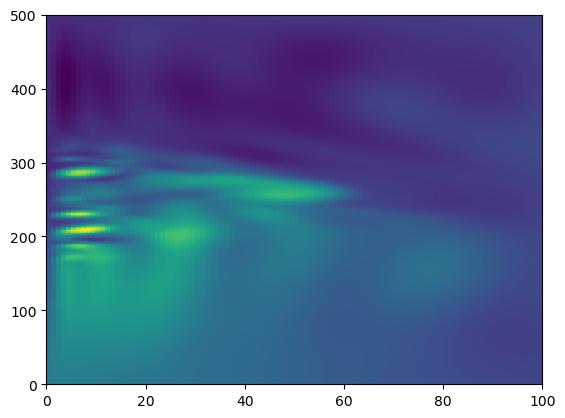

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd4c0daee0>

In [7]:
pcolormesh(P2.η')

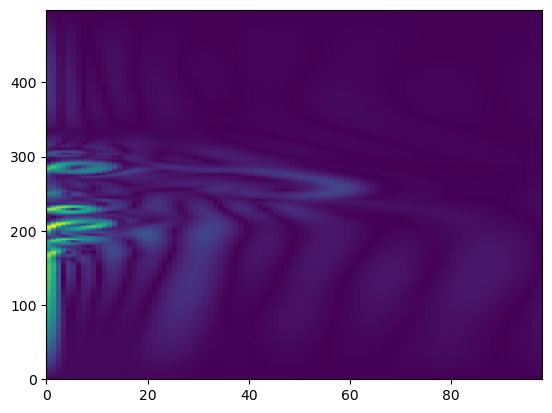

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd2cdd74f0>

In [8]:
speed = sqrt.(Ix(P2.u.^2)[:, 2:end-1] + Iy(P2.v.^2)[2: end-1, :])
pcolormesh(speed')

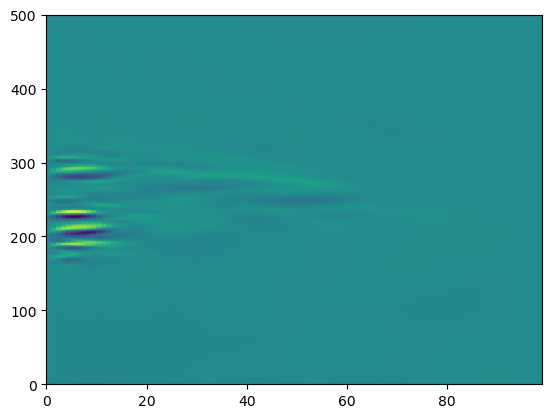

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd2d7304c0>

In [9]:
pcolormesh(P2.u')
# pcolormesh(P2.v')

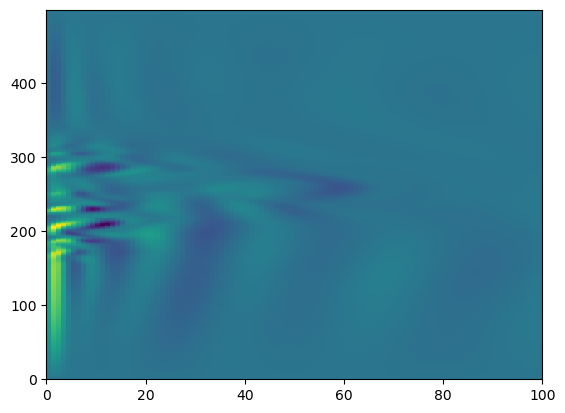

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd2db3b6a0>

In [10]:
pcolormesh(P2.v')

In [6]:
?Parameter

search: Parameter



Creates a Parameter struct with following options and default values

```
T::DataType=Float32                 # number format

Tprog::DataType=T                   # number format for prognostic variables
Tcomm::DataType=Tprog               # number format for ghost-point copies

# DOMAIN RESOLUTION AND RATIO
nx::Int=100                         # number of grid cells in x-direction
Lx::Real=2000e3                     # length of the domain in x-direction [m]
L_ratio::Real=2                     # Domain aspect ratio of Lx/Ly

# PHYSICAL CONSTANTS
g::Real=10.                         # gravitational acceleration [m/s]
H::Real=500.                        # layer thickness at rest [m]
ρ::Real=1e3                         # water density [kg/m^3]
ϕ::Real=45.                         # central latitude of the domain (for coriolis) [°]
ω::Real=2π/(24*3600)                # Earth's angular frequency [s^-1]
R::Real=6.371e6                     # Earth's radius [m]

# WIND FORCING OPTIONS
wind_forcing_x::String="channel"    # "channel", "double_gyre", "shear","constant" or "none"
wind_forcing_y::String="constant"   # "channel", "double_gyre", "shear","constant" or "none"
Fx0::Real=0.12                      # wind stress strength [Pa] in x-direction
Fy0::Real=0.0                       # wind stress strength [Pa] in y-direction
seasonal_wind_x::Bool=false         # Change the wind stress with a sine of frequency ωFx,ωFy
seasonal_wind_y::Bool=false         # same for y-component
ωFx::Real=1.0                       # frequency [1/year] for x component
ωFy::Real=1.0                       # frequency [1/year] for y component

# BOTTOM TOPOGRAPHY OPTIONS
topography::String="ridge"          # "ridge", "seamount", "flat", "ridges", "bathtub"
topo_height::Real=50.               # height of seamount [m]
topo_width::Real=300e3              # horizontal scale [m] of the seamount

# SURFACE RELAXATION
surface_relax::Bool=false           # yes?
t_relax::Real=100.                  # time scale of the relaxation [days]
η_refh::Real=5.                     # height difference [m] of the interface relaxation profile
η_refw::Real=50e3                   # width [m] of the tangent used for the interface relaxation

# SURFACE FORCING
surface_forcing::Bool=false         # yes?
ωFη::Real=1.0                       # frequency [1/year] for surfance forcing
A::Real=3e-5                        # Amplitude [m/s]
ϕk::Real=ϕ                          # Central latitude of Kelvin wave pumping
wk::Real=10e3                       # width [m] in y of Gaussian used for surface forcing

# TIME STEPPING OPTIONS
RKo::Int=4                          # Order of the RK time stepping scheme (2,3 or 4)
cfl::Real=1.0                       # CFL number (1.0 recommended for RK4, 0.6 for RK3, 0.1 for RK2)
Ndays::Real=10.0                    # number of days to integrate for
nstep_diff::Int=1                   # diffusive part every nstep_diff time steps.
nstep_advcor::Int=0                 # advection and coriolis update every nstep_advcor time steps.
                                    # 0 means it is included in every RK4 substep

# BOUNDARY CONDITION OPTIONS
bc::String="periodic"               # "periodic" or anything else for nonperiodic
α::Real=2.                          # lateral boundary condition parameter
                                    # 0 free-slip, 0<α<2 partial-slip, 2 no-slip

# MOMENTUM ADVECTION OPTIONS
adv_scheme::String="ArakawaHsu"     # "Sadourny" or "ArakawaHsu"
dynamics::String="nonlinear"        # "linear" or "nonlinear"

# BOTTOM FRICTION OPTIONS
bottom_drag::String="quadratic"     # "linear", "quadratic" or "none"
cD::Real=1e-5                       # bottom drag coefficient [dimensionless] for quadratic
τD::Real=300.                       # bottom drag coefficient [days] for linear

# DIFFUSION OPTIONS
diffusion::String="constant"        # "Smagorinsky" or "constant", biharmonic in both cases
νB::Real=500.0                      # [m^2/s] scaling constant for constant biharmonic diffusion
cSmag::Real=0.15                    # Smagorinsky coefficient [dimensionless]

# TRACER ADVECTION
tracer_advection::Bool=true         # yes?
tracer_relaxation::Bool=false       # yes?
tracer_consumption::Bool=false      # yes?
tracer_pumping::Bool=false          # yes?
injection_region::String="west"     # "west", "south", "rect" or "flat"
sst_initial::String="south"         # "west", "south", "rect", "flat" or "restart"
sst_rect_coords::Array{Float64,1}=[0.,0.15,0.,1.0]
                                    # (x0,x1,y0,y1) are the size of the rectangle in [0,1]
Uadv::Real=0.25                     # Velocity scale [m/s] for tracer advection
SSTmax::Real=1.                     # tracer (sea surface temperature) max for restoring
SSTmin::Real=0.                     # tracer (sea surface temperature) min for restoring
τSST::Real=500.                     # tracer restoring time scale [days]
jSST::Real=365.                     # tracer consumption [days]
SST_λ0::Real=222e3                  # [m] transition position of relaxation timescale
SST_λs::Real=111e3                  # [m] transition width of relaxation timescale
SST_γ0::Real=8.35                   # [days] injection time scale
SSTw::Real=5e3                      # width [m] of the tangent used for the IC and interface relaxation
SSTϕ::Real=0.5                      # latitude/longitude fraction ∈ [0,1] of sst edge

# OUTPUT OPTIONS
output::Bool=false                  # netcdf output?
output_vars::Array{String,1}=["u","v","η","sst"]  # which variables to output? q,ζ,du,dv,dη also allowed.
output_dt::Real=6                   # output time step [hours]
outpath::String=pwd()               # path to output folder

# INITIAL CONDITIONS
initial_cond::String="rest"         # "rest" or "ncfile" for restart from file
initpath::String=outpath            # folder where to pick the restart files from
init_run_id::Int=0                  # run id for restart from run number
init_starti::Int=-1                 # timestep to start from (-1 meaning last)
get_id_mode::String="continue"      # How to determine the run id: "continue" or "fill"
run_id::Int=-1                      # Output with a specific run id
init_interpolation::Bool=true       # Interpolate the initial conditions in case grids don't match?
```


In [11]:
P3 = RunModel(Ndays=400, nx=100, L_ratio=1, bc="periodic",
              wind_forcing_x="shear", topography="ridges", output=true)

Starting ShallowWaters run 7 on Sun, 15 Nov 2020 11:22:08
Model integration will take approximately 57.0s,
and is hopefully done on Sun, 15 Nov 2020 11:23:08
1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%71%72%73%74%75%76%77%78%79%80%81%82%83%84%85%86%87%88%89%90%91%92%93%94%95%96%97%98%99%100% Integration done in 1min, 0s.
All data stored.


ShallowWaters.PrognosticVars{Float32}(Float32[-0.14432932 -0.7220088 … 1.2553816 0.9086238; -0.13810873 -0.72227776 … 1.2760329 0.9611543; … ; -0.18696514 -0.7748052 … 1.2255677 0.84887975; -0.16229136 -0.7423048 … 1.2436823 0.87372065], Float32[-0.0066820737 -0.008751208 … 0.066213176 0.04957544; 0.0011009703 0.011691297 … 0.07431787 0.051899523; … ; -0.024203988 -0.05459708 … 0.048936896 0.027292699; -0.017512023 -0.03559479 … 0.053237453 0.037663084], Float32[-6.8952556 -6.8174286 … -7.4403644 -7.7221055; -6.8973136 -6.8193374 … -7.439153 -7.733351; … ; -6.888815 -6.805171 … -7.4364944 -7.700045; -6.8923516 -6.812608 … -7.4396877 -7.711182], Float32[0.9999995 0.99999744 … 0.013510579 0.01268683; 0.9999995 0.9999972 … 0.013996643 0.01279505; … ; 0.99999934 0.99999803 … 0.012907166 0.012557161; 0.9999995 0.9999978 … 0.013152683 0.012613053])

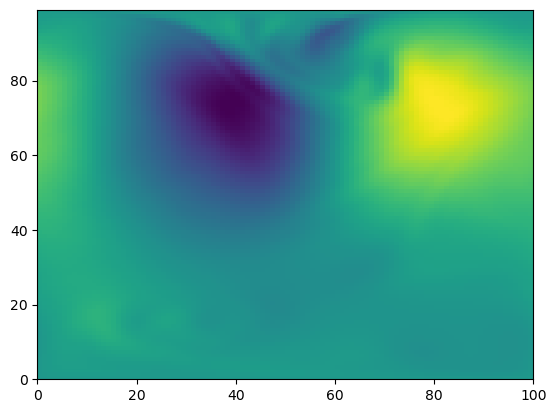

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd2dd88eb0>

In [12]:
pcolormesh(P3.v')

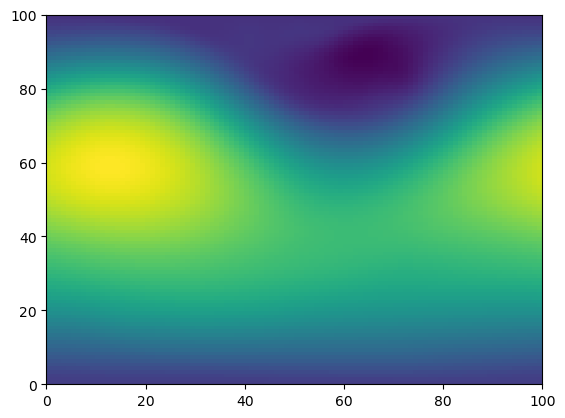

PyObject <matplotlib.collections.QuadMesh object at 0x7ffd309a7610>

In [14]:
pcolormesh(P3.η')

UndefVarError: UndefVarError: type not defined